<a href="https://colab.research.google.com/github/antmota/AnalisisDeDelitos_GoogleColab/blob/main/Analizamos_los_delitos_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descargar csv de delitos en la página de Buenos Aires Data: https://data.buenosaires.gob.ar/dataset/delitos

Importamos las librerias que utilizaremos.

In [35]:
import pandas as pd
import plotly.express as px  
import plotly.graph_objects as go

Nos conectamos con google drive.

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Leemos el archivo con el que trabajaremos y creamos el DataFrame del mismo.

In [37]:
df = pd.read_csv('/content/drive/MyDrive/AnalisisDelito/delitos_2020.csv')

## Visualizando datos del DataFrame.

In [38]:
df.head()

id_mapa  anio    mes        dia     fecha franja  \
0  RH-2020-0000480  2020  Enero  Miércoles  01/01/20     10   
1  HD-2020-0001119  2020  Enero  Miércoles  01/01/20     22   
2  RH-2020-0001140  2020  Enero  Miércoles  01/01/20     19   
3  RH-2020-0001187  2020  Enero  Miércoles  01/01/20     17   
4  RH-2020-0010817  2020  Enero  Miércoles  01/01/20      2   

                    tipo    subtipo uso_armas        barrio  comuna  \
0  Hurto (sin violencia)        NaN       NaN     Versalles    10.0   
1              Homicidio  Femicidio       NaN  Villa Devoto    11.0   
2   Robo (con violencia)        NaN       NaN     Versalles    10.0   
3   Robo (con violencia)        NaN       NaN     Versalles    10.0   
4  Hurto (sin violencia)        NaN       NaN  Villa Devoto    11.0   

      latitud    longitud  victimas  
0  -34.626641  -58.527606       NaN  
1  -34.611268  -58.525386       1.0  
2  -34.625434  -58.525013       NaN  
3  -34.625434  -58.525013       NaN  
4  -34.606789  -58.520726       NaN

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66725 entries, 0 to 66724
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_mapa    66725 non-null  object 
 1   anio       66725 non-null  int64  
 2   mes        66725 non-null  object 
 3   dia        66725 non-null  object 
 4   fecha      66725 non-null  object 
 5   franja     66725 non-null  object 
 6   tipo       66725 non-null  object 
 7   subtipo    13644 non-null  object 
 8   uso_armas  7281 non-null   object 
 9   barrio     66314 non-null  object 
 10  comuna     66314 non-null  float64
 11  latitud    66725 non-null  object 
 12  longitud   66725 non-null  object 
 13  victimas   201 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 7.1+ MB


Otra forma de ver solo el tipo por cada columna.

In [40]:
df.dtypes

id_mapa       object
anio           int64
mes           object
dia           object
fecha         object
franja        object
tipo          object
subtipo       object
uso_armas     object
barrio        object
comuna       float64
latitud       object
longitud      object
victimas     float64
dtype: object

Si queremos saber solo el tamaño de la base de datos, usamos el comando shape.


In [41]:
df.shape

(66725, 14)

Si queremos ver el total de los valores que componen mi base de datos usamos size.

In [42]:
df.size

934150

Cantidad de valores nulos por columnas.

In [43]:
df.isnull().sum()

id_mapa          0
anio             0
mes              0
dia              0
fecha            0
franja           0
tipo             0
subtipo      53081
uso_armas    59444
barrio         411
comuna         411
latitud          0
longitud         0
victimas     66524
dtype: int64

Renombramos la columna tipo para que sea mas transparente.

In [44]:
df = df.rename(columns={'tipo':'tipo_delito'})

In [45]:
df.columns

Index(['id_mapa', 'anio', 'mes', 'dia', 'fecha', 'franja', 'tipo_delito',
       'subtipo', 'uso_armas', 'barrio', 'comuna', 'latitud', 'longitud',
       'victimas'],
      dtype='object')

A la columna comuna cambiarle el tipo, la pasamos a entero porque esta como flotante y no es correcto.

In [46]:
#Borramos los valores Null de la culumna comuna
df = df.dropna(subset=['comuna'])

In [48]:
#Cambiando de tipo de float a entero la columna comuna
df.comuna = df.comuna.astype(int)

In [49]:
df.dtypes

id_mapa         object
anio             int64
mes             object
dia             object
fecha           object
franja          object
tipo_delito     object
subtipo         object
uso_armas       object
barrio          object
comuna           int64
latitud         object
longitud        object
victimas       float64
dtype: object

In [50]:
df.isnull().sum()

id_mapa            0
anio               0
mes                0
dia                0
fecha              0
franja             0
tipo_delito        0
subtipo        52982
uso_armas      59045
barrio             0
comuna             0
latitud            0
longitud           0
victimas       66113
dtype: int64

Veamos los dias

In [51]:
df.dia.unique()

array(['Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo', 'Lunes',
       'Martes', 'lunes', 'viernes', 'domingo', 'martes'], dtype=object)

In [52]:
#Reemplazamos en la columna dia los nombres de los dias.
df.dia = df.dia.replace({'lunes': 'Lunes', 'viernes': 'Viernes', 'martes': 'Martes', 'domingo': 'Domingo'})

<Axes: >

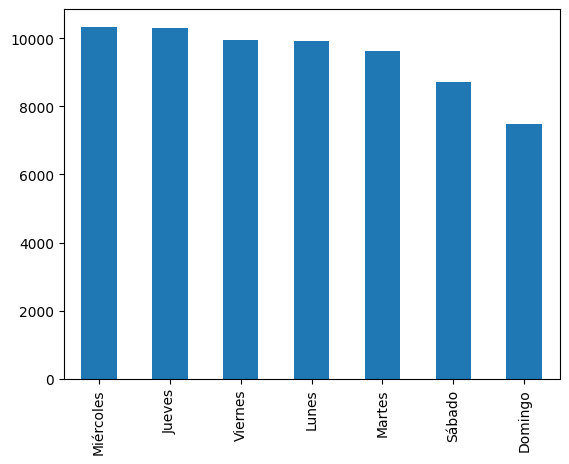

In [53]:
df.dia.value_counts().plot(kind='bar')  # Con este grafico podemos visualizar que los delitos se concentran los días Miércoles y Jueves.

Tipo de delitos



In [54]:
df.tipo_delito.unique() #Observamos los tipos de delito

array(['Hurto (sin violencia)', 'Homicidio', 'Robo (con violencia)',
       'Lesiones'], dtype=object)

In [55]:
#cuantos tipos existe
df.tipo_delito.nunique()

4

Cantidad de delitos por mes

In [56]:
df3 = df.groupby(['mes'])['tipo_delito'].count().reset_index(name='count')
df3

mes  count
0        Abril   1901
1       Agosto   4615
2    Diciembre   6615
3        Enero   9817
4      Febrero   9354
5        Julio   4080
6        Junio   3701
7        Marzo   6009
8         Mayo   3087
9    Noviembre   6476
10     Octubre   5707
11  Septiembre   4952

Graficamos usando Plotly. Tambien tenemos template para customizar los estilos https://plotly.com/python/templates/

In [57]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [58]:
fig = px.bar(df3, x='mes', y='count',
             color='count',
             template='plotly_dark',
             labels={'count':'Cantidad de casos', 'mes': 'Mes'},
             title='Cantidad de delitos por mes',
             height=400)
fig.show()

Cantidad de delitos por dia

In [59]:
df4 = df.groupby(['dia'])['tipo_delito'].count().reset_index(name='count')
df4

dia  count
0    Domingo   7478
1     Jueves  10286
2      Lunes   9913
3     Martes   9634
4  Miércoles  10336
5     Sábado   8718
6    Viernes   9949

Grafiquemos:

In [60]:
fig = px.bar(df4, x='dia', y='count',
             color='count',
             template='ggplot2',
             labels={'tipo_delito':'Tipo Delito', 'dia': 'Día'},
             title='Cantidad de delitos por día',
             height=400)
fig.show()

Veamos solo los casos de homicidio por barrio. ¿Se relacionará con la cantidad de casos totales por barrios?

In [61]:
df5 = df[(df.tipo_delito == 'Homicidio')]
df5.head()

id_mapa  anio    mes        dia     fecha franja tipo_delito  \
1     HD-2020-0001119  2020  Enero  Miércoles  01/01/20     22   Homicidio   
1018     HC-2020-7157  2020  Enero     Sábado  04/01/20     10   Homicidio   
1316     HC-2020-9055  2020  Enero    Domingo  05/01/20     20   Homicidio   
2029  HD-2020-0014660  2020  Enero     Martes  07/01/20     23   Homicidio   
2194  HD-2020-0015358  2020  Enero  Miércoles  08/01/20     10   Homicidio   

             subtipo uso_armas         barrio  comuna     latitud    longitud  \
1          Femicidio       NaN   Villa Devoto      11  -34.611268  -58.525386   
1018  Siniestro Vial       NaN   Villa Crespo      15  -34.592133  -58.439106   
1316  Siniestro Vial       NaN         Flores       7  -34.646459  -58.450195   
2029          Doloso       NaN  Nueva Pompeya       4  -34.653266  -58.407148   
2194          Doloso       NaN       Saavedra      12  -34.547826  -58.475235   

      victimas  
1          1.0  
1018       1.0  
1316       1.0  
2029       1.0  
2194       1.0

In [62]:
df6 = df5.groupby('barrio')['tipo_delito'].count().reset_index(name='homicidio').sort_values(by='homicidio', ascending=False)
df6.head()

barrio  homicidio
25        Retiro         21
2       Barracas         19
8   Constitución         16
1      Balvanera         14
9         Flores         13

# Cantidad de delitos por barrios


Lo que puedo hacer es filtrar por ejemplo los barrios con mas de 2000 delitos y graficar, para saber cual es el que tiene mas delitos. 

In [63]:
df7 = df.groupby(['barrio'])['tipo_delito'].count().reset_index()
df8 = df7[df7.tipo_delito > 2000]
df8.head()

barrio  tipo_delito
1    Almagro         2748
2  Balvanera         4503
3   Barracas         2422
4   Belgrano         2238
7  Caballito         3050

Me interesa saber la cantidad de delitos por comuna, porque por ejemplo puedo elegir un barrio que este en la comuna con menos delitos.

In [64]:
df9 = df.groupby('comuna')['tipo_delito'].count().reset_index(name='Cantidad').sort_values(by='Cantidad',
                                                                            ascending=False)
df9.head()

comuna  Cantidad
0        1      7992
3        4      6467
2        3      5860
13      14      5467
6        7      4961

¿Cuántos casos hay por tipo de delito?

In [65]:
df10 = df['tipo_delito'].value_counts(ascending=True).reset_index()
df10

index  tipo_delito
0              Homicidio          201
1               Lesiones         6094
2  Hurto (sin violencia)        25616
3   Robo (con violencia)        34403

In [66]:
df10.columns = ['tipo_delito', 'count']
df10

tipo_delito  count
0              Homicidio    201
1               Lesiones   6094
2  Hurto (sin violencia)  25616
3   Robo (con violencia)  34403

In [67]:
fig = px.bar(df10, x='tipo_delito', y='count',
             color='count',
             template='xgridoff',
             labels={'tipo_delito':'Tipo Delito', 'dia': 'Día'},
             title='Cantidad por tipo de delitos',
             height=400)
fig.show()

# Y ahora nuestro mapa...

Nos hacemos la cuenta en https://account.mapbox.com/ y usamos el token.

Informativo: Diferencia entre Mapbox Maps vs Geo Maps: https://plotly.com/python/mapbox-layers/ 

In [68]:
df11 = df.groupby(['barrio','longitud','latitud'])['tipo_delito'].count().reset_index()
df11.head()

barrio    longitud     latitud  tipo_delito
0  Agronomía  -58.476035  -34.592091            1
1  Agronomía  -58.476968  -34.591493            1
2  Agronomía   -58.47762  -34.596158            1
3  Agronomía   -58.47804  -34.596662            1
4  Agronomía  -58.478826  -34.599237            1

https://plotly.com/python/builtin-colorscales/ para el color.

In [69]:
token = 'pk.eyJ1IjoicHJpc2NpbGFjzSIsImEiOiJja3B5MzB5MW$wNTh0MnBwazRwcndsbzhpIn0.Vfhtbes8SPKW2TKEhNcrrQ'

fig = go.Figure(go.Scattermapbox(
    lon = df11.longitud,
    lat = df11.latitud,
    mode = 'markers+text',
    marker = go.scattermapbox.Marker(size=df11.tipo_delito,
                                     color=df11.tipo_delito,
                                     colorscale='Edge',
                                     showscale=True,
                                     sizemode='diameter',
                                     opacity=0.8),
    hoverinfo='text',
    hovertext=
    '<b>Barrio</b>: ' + df11['barrio'].astype(str) + '<br>' +
    '<b>Cantidad de delitos</b>: ' + df11['tipo_delito'].astype(str) + '<br>'
))
fig.update_layout(
    hovermode='x',
    margin=dict(r=0, l =0, b = 0, t = 0),
    mapbox=dict(
        accesstoken = token,
        style= 'stamen-terrain',
        zoom=10,
        center=dict(
            lat = -34.6083,
            lon = -58.3712
        )
    ),
    showlegend=True,
    autosize=True
)

Y ahora otra forma...

In [70]:
token = 'pk.eyJ1IjoicHJpc2NpbGFjzSIsImEiOiJja3B5MzB5MW$wNTh0MnBwazRwcndsbzhpIn0.Vfhtbes8SPKW2TKEhNcrrQ'

fig = go.Figure(go.Scattermapbox(
    lon = df11.longitud,
    lat = df11.latitud,
    mode = 'markers+text',
    marker = go.scattermapbox.Marker(size=df11.tipo_delito,
                                     color=df11.tipo_delito,
                                     colorscale='Edge',
                                     showscale=True,
                                     sizemode='area',
                                     opacity=0.9),
    hoverinfo='text',
    hovertext=
    '<b>Barrio</b>: '+ df11['barrio'].astype(str) + '<br>' +
    '<b>Cantidad de delitos</b>: ' + df11['tipo_delito'].astype(str) + '<br>'
))
fig.update_layout(
    hovermode='x',
    paper_bgcolor= '#010915',
    plot_bgcolor= '#010915',
    margin=dict(r=0, l =0, b = 0, t = 0),
    mapbox=dict(
        accesstoken = 'pk.eyJ1IjoicHJpc2NpbGFjZSIsImEiOiJja3E3Y2FkdW0wNG9xMm5yemcxcXU5a3MyIn0.2hUiO28HqArvh9JSgs8MKQ',
        style= 'dark',
        zoom=10,
        center=dict(
            lat = -34.6083,
            lon = -58.3712
        )
    ),
    showlegend = True
)
fig.show()